# Summary

The package `cardiovector.reconstruction` implements various VCG reconstruction algorithms.


# What's implemented

Currently, there are three algorithms implemented: two matrix-based and one statistical.

Matrix based algorithms are _Kors_ and _Inverse Dower Transform_. Statistical algorithm is based on _Principal Component Analysis_.

In [1]:
import matplotlib.pyplot as plt
import wfdb

from cardiovector import reconstruction as rec, preprocessing as prep, plotting

First, let's load sample data from PhysioNet, using `wfdb`.

In [2]:
wfdb.dldatabase('ptbdb', dlbasedir='data/',
                records=['patient001/s0010_re'],
                overwrite=False)

Finished downloading files


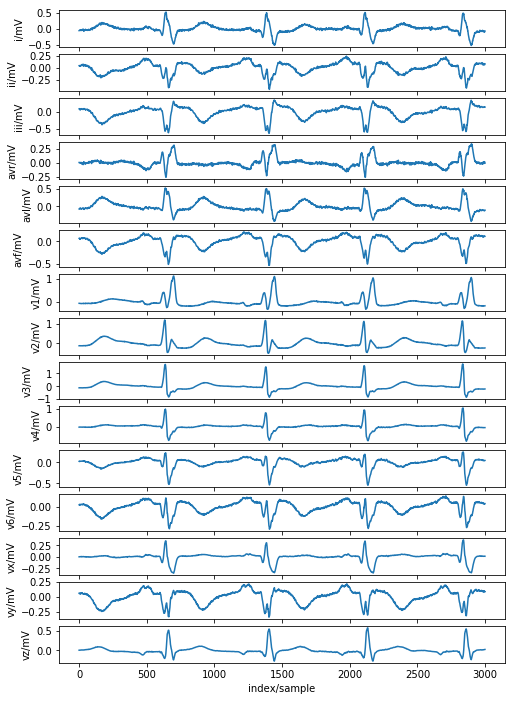

In [3]:
raw_record = wfdb.rdsamp('data/patient001/s0010_re')
record = prep.remove_baseline_wandering(raw_record)
record = prep.recslice(record, sampto=3000)
wfdb.plotrec(record, figsize=(8, 12))

This is a classical 12-lead ECG record. You might also notice three signals named `vx`, `vy`, `vz`. These are the vectorcardiographic leads taken from the patient using actual VCG Frank 8-lead system.

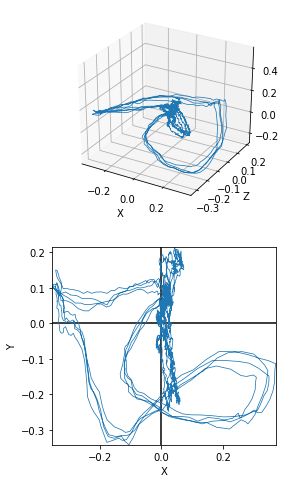

In [4]:
plotting.plotvcg(record, signals=['vx', 'vy', 'vz'],
                 plot=['3d', 'frontal'])

Using this package, you might try to reconstruct such signal from ECG leads. There are many methods of doing that.

## `reconstruction.kors_vcg`

Reconstruct a VCG using a Kors algorithm.

Same as `reconstruction.vcg_reconstruct(record, 'kors')`.

In [5]:
help(rec.kors_vcg)

Help on function kors_vcg in module cardiovector.reconstruction:

kors_vcg(record)
    Reconstruct VCG from 12-lead ECG using Kors regression matrix algorithm.
    
    Parameters
    ----------
    record : wfdb.Record
        Record object containing the 12-lead ECG signal.
    
    Returns
    -------
    wfdb.Record
        Record object containing reconstructed VCG signal.



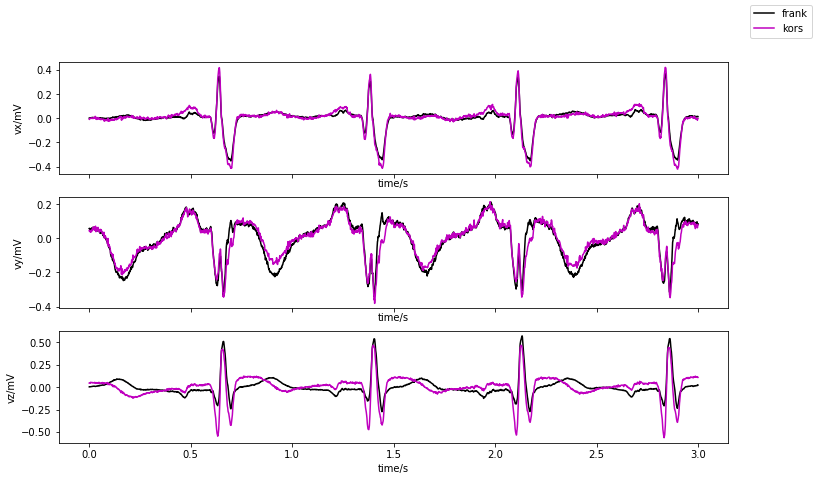

In [6]:
kors_record = rec.kors_vcg(record)
plotting.plotrecs([record, kors_record], 
                  signals=['vx', 'vy', 'vz'], labels=['frank', 'kors'], 
                  fig_kw={'figsize': (12,7)})

This is a very popular method of reconstruction yielding very good results.

## `reconstruction.idt_vcg`

Reconstruct a VCG using an Inverse Dower Transform algorithm.

Same as `reconstruction.vcg_reconstruct(record, 'idt')`.

In [7]:
help(rec.idt_vcg)

Help on function idt_vcg in module cardiovector.reconstruction:

idt_vcg(record)
    Reconstruct VCG from 12-lead ECG using Inverse Dower Transform matrix algorithm.
    
    Parameters
    ----------
    record : wfdb.Record
        Record object containing the 12-lead ECG signal.
    
    Returns
    -------
    wfdb.Record
        Record object containing reconstructed VCG signal.



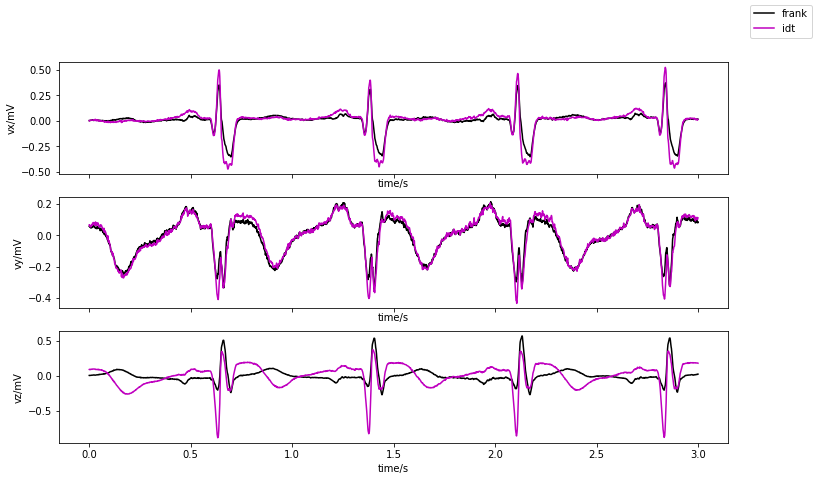

In [8]:
idt_record = rec.idt_vcg(record)
plotting.plotrecs([record, idt_record], 
                  signals=['vx', 'vy', 'vz'], labels=['frank', 'idt'], 
                  fig_kw={'figsize': (12,7)})

Method based on an inverse algorithm (used to reconstruct 12-lead ECG from VCG). Historically first (AFAIK). Many times proved inferior to Kors' method.

## `reconstruction.pca_vcg`

Reconstruct a VCG using PCA-based algorithm.

Same as `reconstruction.vcg_reconstruct(record, 'pca')`.

In [9]:
help(rec.pca_vcg)

Help on function pca_vcg in module cardiovector.reconstruction:

pca_vcg(record)
    Reconstruct VCG from 12-lead ECG using PCA-based reconstruction algorithm.
    
    Parameters
    ----------
    record : wfdb.Record
        Record object containing the 12-lead ECG signal.
    
    Returns
    -------
    wfdb.Record
        Record object containing reconstructed VCG signal.



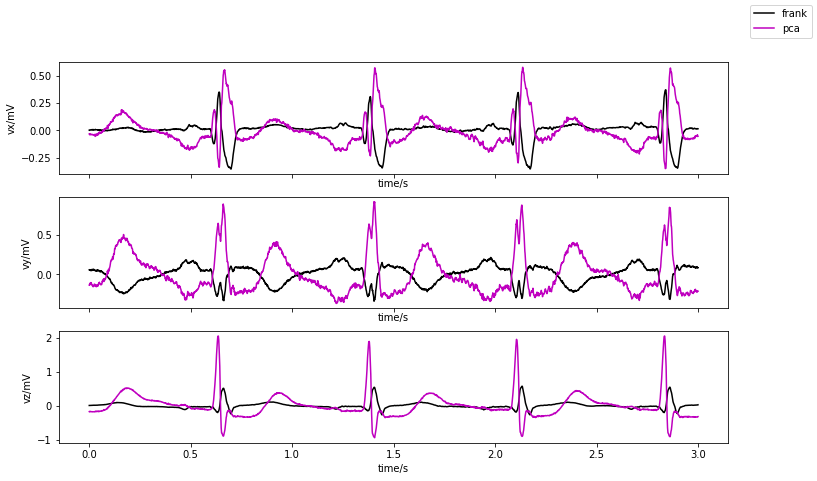

In [10]:
pca_record = rec.pca_vcg(record)
plotting.plotrecs([record, pca_record], 
                  signals=['vx', 'vy', 'vz'], labels=['frank', 'pca'], 
                  fig_kw={'figsize': (12,7)})